<a href="https://colab.research.google.com/github/Ksenyakin/MO/blob/main/ind3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Предобработка данных:

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('apartments_for_rent_classified_10K.csv', encoding='latin1', sep=';', on_bad_lines='skip')
data.replace('?', np.nan, inplace=True)

print("Количество пропущенных значений до обработки:")
print(data.isnull().sum())

categorical_columns = ['amenities', 'pets_allowed', 'address', 'cityname', 'state']
for column in categorical_columns:
    if column in data.columns:
        mode = data[column].mode()[0]
        data[column].fillna(mode, inplace=True)

numerical_columns = ['bathrooms', 'bedrooms', 'latitude', 'longitude', 'price', 'square_feet']
for column in numerical_columns:
    if column in data.columns:
        median = data[column].median()
        data[column].fillna(median, inplace=True)

print("Количество пропущенных значений после обработки:")
print(data.isnull().sum())

for column in label_encodable_columns:
    if column in data.columns:
        le = LabelEncoder()
        data[column] = le.fit_transform(data[column].astype(str))


Количество пропущенных значений до обработки:
id                  0
category            0
title               0
body                0
amenities        3549
bathrooms          34
bedrooms            7
currency            0
fee                 0
has_photo           0
pets_allowed     4163
price               0
price_display       0
price_type          0
square_feet         0
address          3327
cityname           77
state              77
latitude           10
longitude          10
source              0
time                0
dtype: int64
Количество пропущенных значений после обработки:
id               0
category         0
title            0
body             0
amenities        0
bathrooms        0
bedrooms         0
currency         0
fee              0
has_photo        0
pets_allowed     0
price            0
price_display    0
price_type       0
square_feet      0
address          0
cityname         0
state            0
latitude         0
longitude        0
source           0
time     

<ipython-input-31-4d78f81a4c94>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(mode, inplace=True)
<ipython-input-31-4d78f81a4c94>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

Анализ данных:

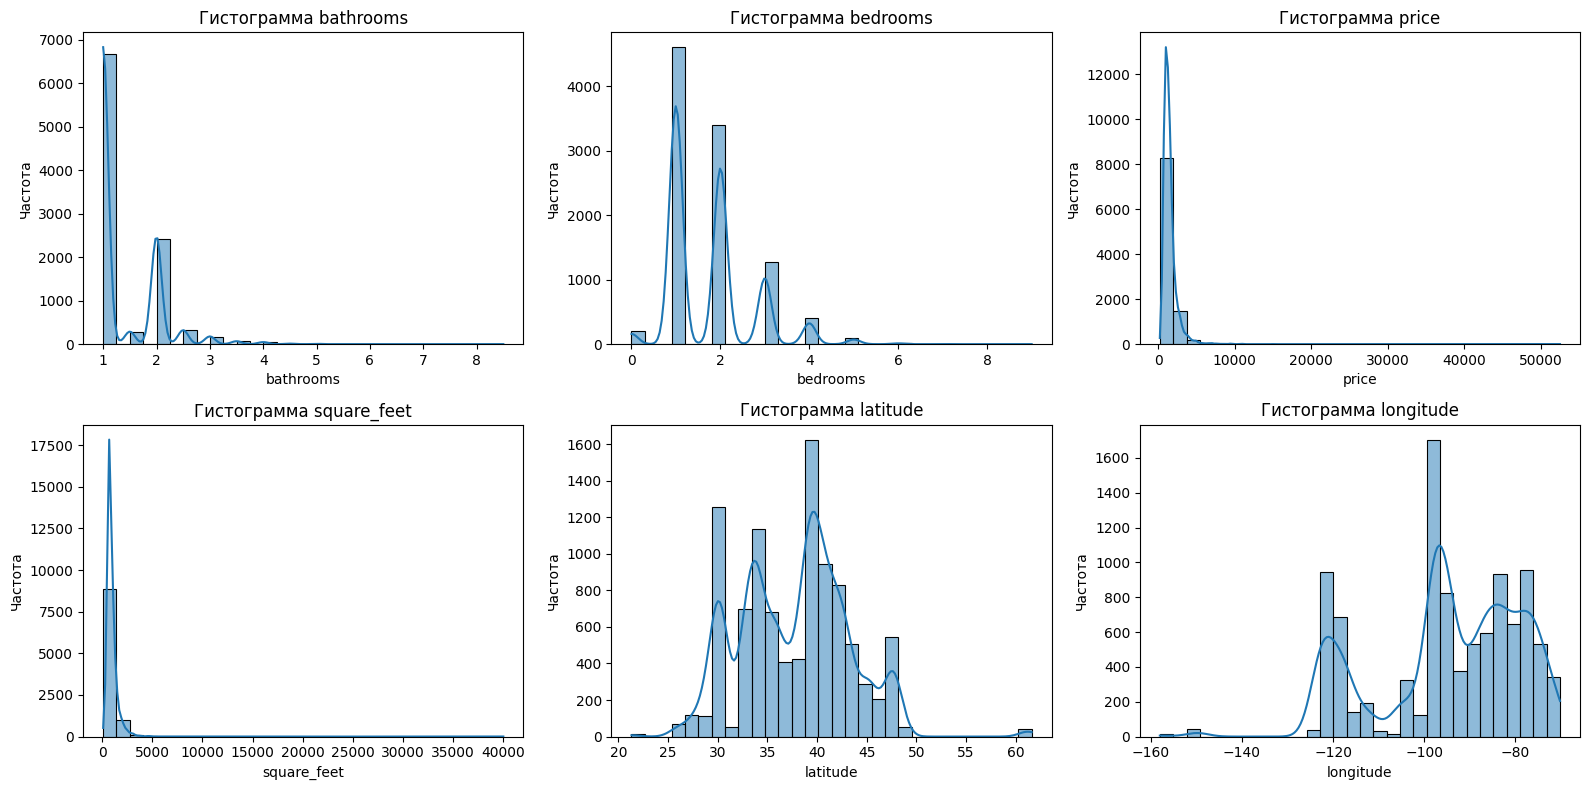

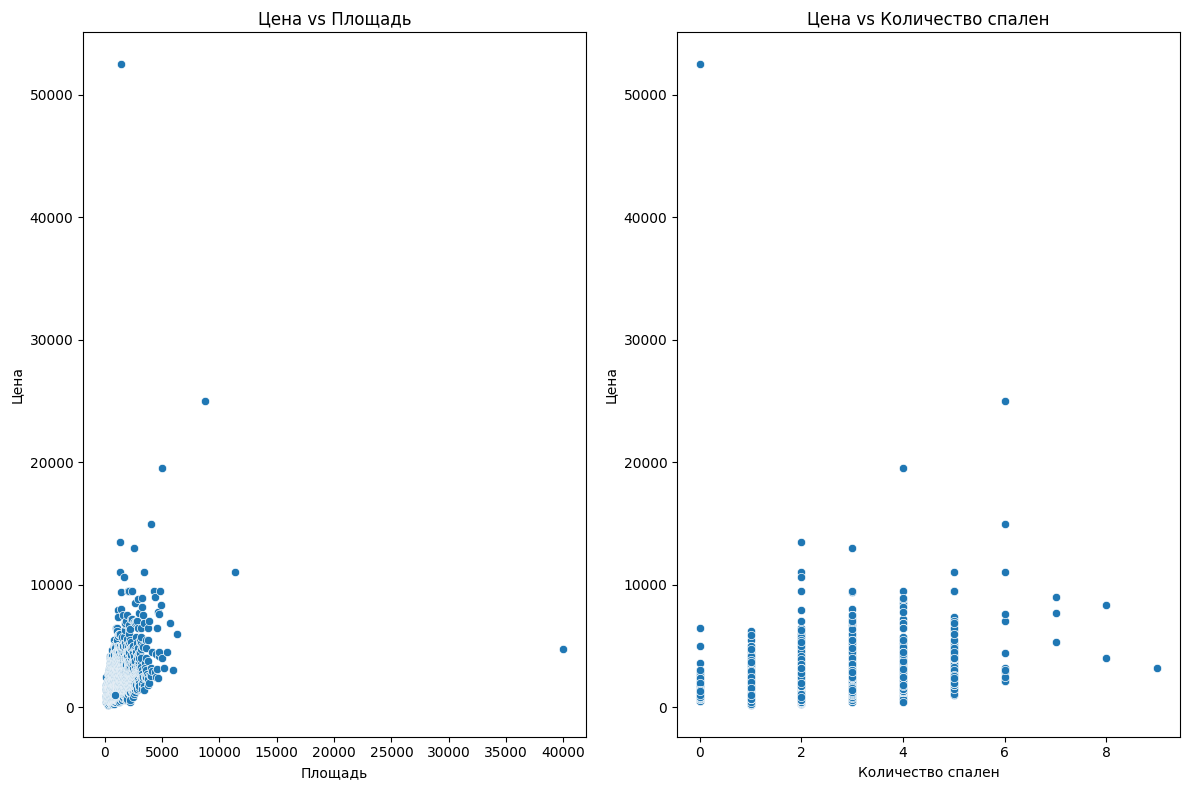

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Гистограмма для числовых переменных
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']

plt.figure(figsize=(16, 8))

# Для каждой числовой переменной создадим гистограмму
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f'Гистограмма {column}')
    plt.xlabel(column)
    plt.ylabel('Частота')

plt.tight_layout()
plt.show()

# Диаграммы рассеяния
plt.figure(figsize=(12, 8))

# Рассеяние "price" vs "square_feet"
plt.subplot(1, 2, 1)
sns.scatterplot(data=data, x='square_feet', y='price')
plt.title('Цена vs Площадь')
plt.xlabel('Площадь')
plt.ylabel('Цена')

# Рассеяние "bedrooms" vs "price"
plt.subplot(1, 2, 2)
sns.scatterplot(data=data, x='bedrooms', y='price')
plt.title('Цена vs Количество спален')
plt.xlabel('Количество спален')
plt.ylabel('Цена')

plt.tight_layout()
plt.show()


4. Нормализация данных:

In [40]:
from sklearn.preprocessing import StandardScaler
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data[numerical_columns].head())


   bathrooms  bedrooms     price  square_feet  latitude  longitude
0  -0.616936  -1.85159 -0.646825    -1.288365  0.220178   1.121514
1  -0.616936  -0.79002 -0.985901    -1.280740  0.049468   0.443722
2  -0.616936  -1.85159 -0.089439    -1.279215  0.217502   1.115451
3  -0.616936  -1.85159 -0.521413    -1.265489  1.805904  -1.757092
4  -0.616936  -1.85159 -0.563217    -1.251764  0.214370   1.113933


5. Определение числа кластеров:

Используйте метод локтя или силуэтный метод для определения оптимального количества кластеров для K-means или другого алгоритма кластеризации.


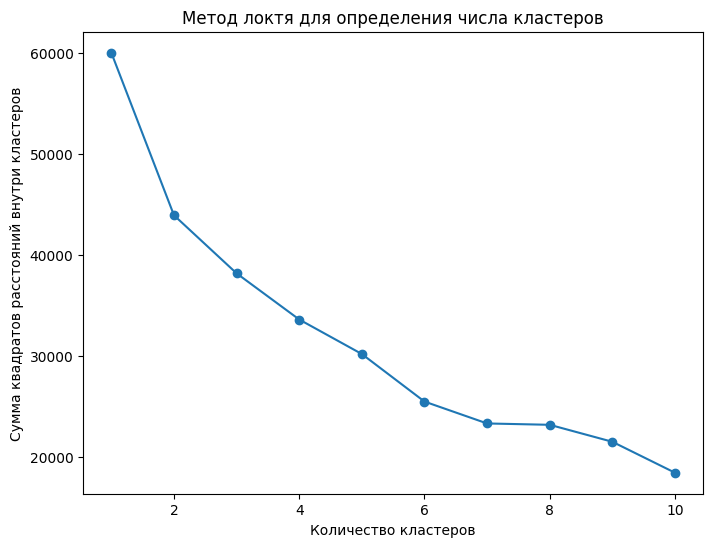

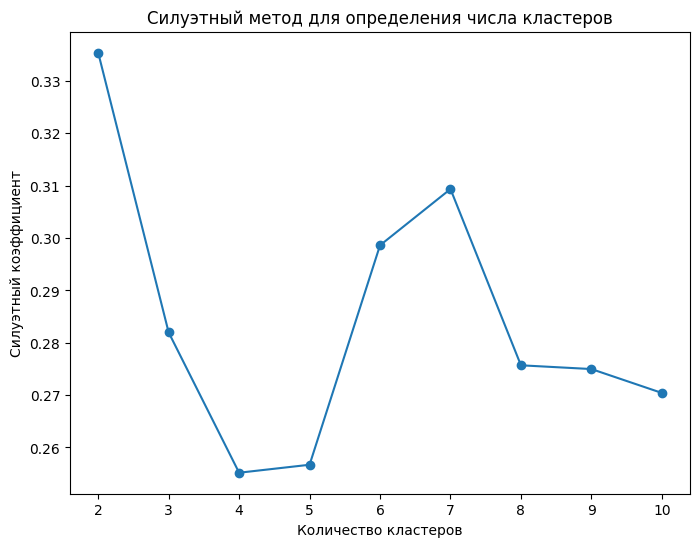

In [42]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Количественные переменные после стандартизации или нормализации
numerical_columns = ['bathrooms', 'bedrooms', 'price', 'square_feet', 'latitude', 'longitude']

# Подготовим данные для кластеризации
X = data[numerical_columns]

# Список для хранения значений инерции
inertia = []

# Пробуем разные числа кластеров от 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод локтя для определения числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний внутри кластеров')
plt.show()


from sklearn.metrics import silhouette_score

# Список для хранения значения силуэтного коэффициента
silhouette_scores = []

# Пробуем разные числа кластеров от 2 до 10 (не имеет смысла для 1 кластера)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Строим график силуэтного коэффициента
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Силуэтный метод для определения числа кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Силуэтный коэффициент')
plt.show()



6. Кластеризация:
  

*   Примените алгоритм K-means или иерархическую кластеризацию к подготовленным данным.
* Постройте визуализации для представления результатов кластеризации (например, графики с центрами кластеров и их распределением по различным переменным).


Центроиды кластеров:
   bathrooms  bedrooms     price  square_feet  latitude  longitude
0  -0.592321 -0.357198 -0.262769    -0.325976  0.626321   0.587134
1   2.009031  2.028703  1.310567     1.826733 -0.071648  -0.458250
2  -0.271972 -0.277110  0.262791    -0.272948  1.374441  -1.756181
3   4.505056  2.681827  8.271319     5.998744 -0.456786  -0.930991
4  -0.598286 -0.567388 -0.414582    -0.364979 -0.832156   0.732797
5  -0.588689 -0.607855 -0.222656    -0.420114 -1.021021  -0.549018
6   1.007690  0.725936  0.080769     0.447985 -0.193663   0.359784

Распределение объектов по кластерам:
cluster
0    3106
6    2322
5    2102
2     995
4     786
1     652
3      37
Name: count, dtype: int64


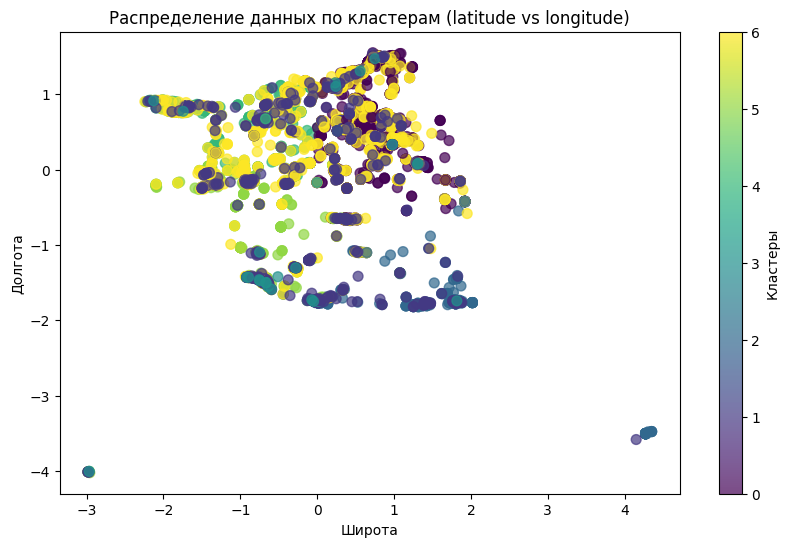

In [45]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np

# Применение алгоритма K-means
kmeans = KMeans(n_clusters=7, random_state=42)  # Выбираем 5 кластеров
kmeans.fit(normalized_data)

# Получаем метки кластеров для каждого наблюдения
data['cluster'] = kmeans.labels_

# Преобразуем центроиды кластеров в DataFrame
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=quantitative_columns)

# Выводим центроиды кластеров
print("Центроиды кластеров:")
print(centroids)

# Вывод распределения объектов по кластерам
cluster_distribution = data['cluster'].value_counts()
print("\nРаспределение объектов по кластерам:")
print(cluster_distribution)

# Визуализация результатов кластеризации (по координатам latitude и longitude)
plt.figure(figsize=(10, 6))
plt.scatter(data['latitude'], data['longitude'], c=data['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.title('Распределение данных по кластерам (latitude vs longitude)')
plt.xlabel('Широта')
plt.ylabel('Долгота')
plt.colorbar(label='Кластеры')
plt.show()
